<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section3_Lab3_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
SEED = 42
np.random.seed(SEED)

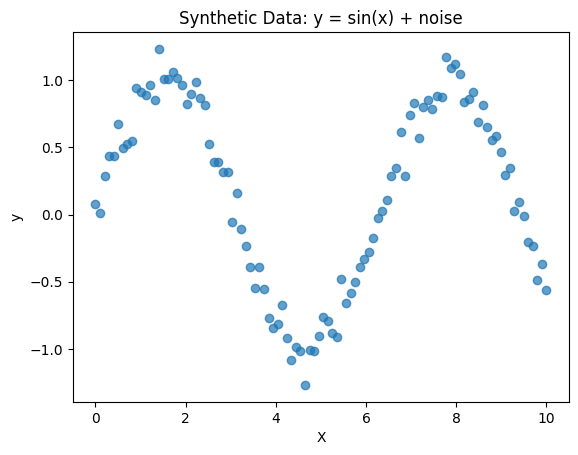

In [ ]:
# Create synthetic dataset (non-linear relationship)
# We’ll use a sinusoidal + noise dataset.
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Data: y = sin(x) + noise")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=SEED
)

Linear Regression:
MSE: 0.6065910734093521
R²: -0.09674673596524275


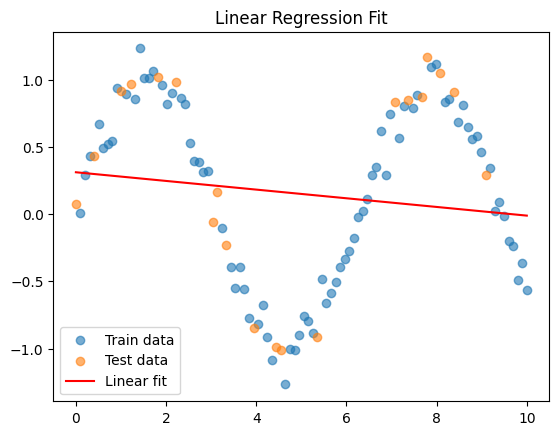

In [ ]:
#Fit a simple Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R²:", r2_score(y_test, y_pred_lin))


# Plot
plt.scatter(X_train, y_train, label="Train data", alpha=0.6)
plt.scatter(X_test, y_test, label="Test data", alpha=0.6)
plt.plot(X, lin_reg.predict(X), color="red", label="Linear fit")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

**Observation: Straight line won’t capture sine pattern → underfitting.**

Degree 3 → MSE=0.493, R²=0.109


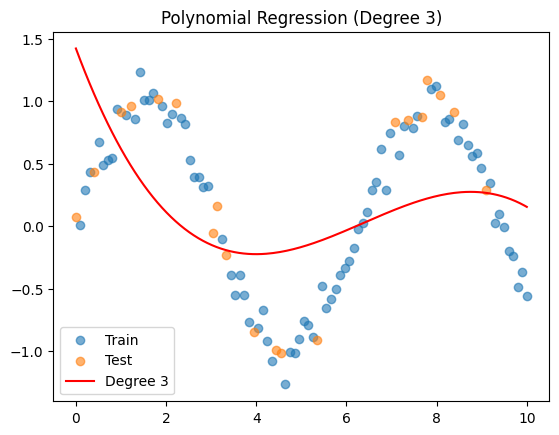

Degree 5 → MSE=0.070, R²=0.873


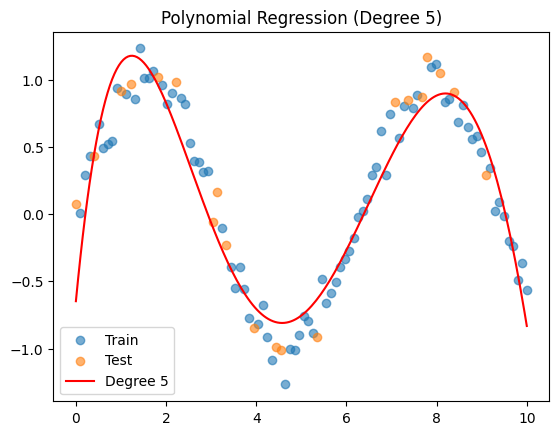

Degree 10 → MSE=0.012, R²=0.978


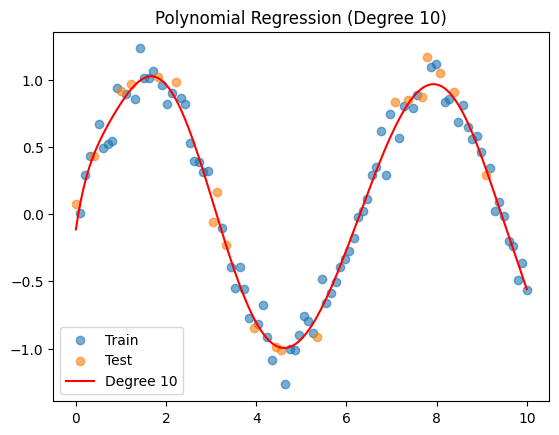

In [ ]:
def poly_regression(degree):
  model = Pipeline([
      ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
      ("scaler", StandardScaler()),
      ("linreg", LinearRegression())
  ])

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"Degree {degree} → MSE={mse:.3f}, R²={r2:.3f}")

  # Plot fit
  X_range = np.linspace(0, 10, 200).reshape(-1, 1)
  y_range_pred = model.predict(X_range)
  plt.scatter(X_train, y_train, alpha=0.6, label="Train")
  plt.scatter(X_test, y_test, alpha=0.6, label="Test")
  plt.plot(X_range, y_range_pred, color="red", label=f"Degree {degree}")
  plt.legend()
  plt.title(f"Polynomial Regression (Degree {degree})")
  plt.show()

for d in [3, 5, 10]:
    poly_regression(d)

* Degree 3: better than linear, still some bias
* Degree 5: closer to sine curve, good generalization
* Degree 10: fits training perfectly but may wiggle too much → overfitting

**Anyways lets compare performance**

In [ ]:
results = []
for d in [1, 3, 5, 10]:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({"Degree": d,
                    "MSE": mean_squared_error(y_test, y_pred),
                    "R²": r2_score(y_test, y_pred)})


df_results = pd.DataFrame(results)
print(df_results)

   Degree       MSE        R²
0       1  0.606591 -0.096747
1       3  0.492555  0.109436
2       5  0.070172  0.873126
3      10  0.012421  0.977543
